In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from google.colab.patches import cv2_imshow
import random
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
img1=cv2.imread("/content/black spot.png");
img2=cv2.imread("/content/canker image.png");
img3=cv2.imread("/content/greening.png");
img4=cv2.imread("/content/healthy.png");
img5=cv2.imread("/content/melanose.jpg");

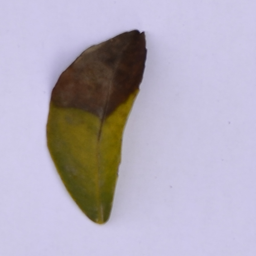

In [ ]:
cv2_imshow(img1)

In [ ]:
img1.shape

(256, 256, 3)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print(img1.shape[0],img1.shape[1])

256 256


array([[230, 199, 204, ..., 231, 201, 206],
       [229, 198, 203, ..., 231, 201, 206],
       [229, 199, 204, ..., 231, 201, 206],
       ...,
       [230, 200, 205, ..., 229, 199, 204],
       [229, 202, 206, ..., 229, 199, 204],
       [230, 203, 207, ..., 229, 199, 204]], dtype=uint8)
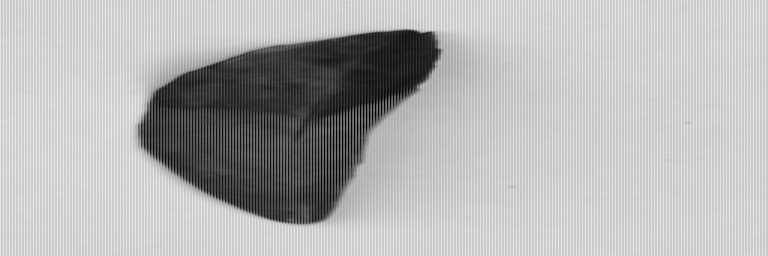

In [ ]:
reshapeddata=img1.reshape(256,256*3)
reshapeddata

In [ ]:
def reshapeddata(img_rows, img_cols):
    # Assuming reshapeddata() returns the necessary data
    (X_train, y_train), (X_test, y_test) = reshapeddata()
    # Assuming reshapeddata() provides the necessary data
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255.0
    X_test /= 255.0
    return (X_train, y_train), (X_test, y_test)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
    X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
    print(X_train.shape)
    print(X_test.shape)
    X_train=X_train/255
    X_test=X_test/255

In [ ]:
type(reshapeddata)

function

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [ ]:
model.add(MaxPool2D(2,2))

In [ ]:
model.add(Flatten())
model.add(Dense(100,activation='relu'))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
labels=['Black spot','Canker','Greening','Healthy','Melanose']
y_true = np.random.randint(low=0, high=5, size=400, dtype=int)

In [ ]:
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)
print('classes indexes:' , classesIndexes)
print('\n')
print('classes frequency:', classesFrequency)

classes indexes: [0 1 2 3 4]


classes frequency: [85 68 66 92 89]


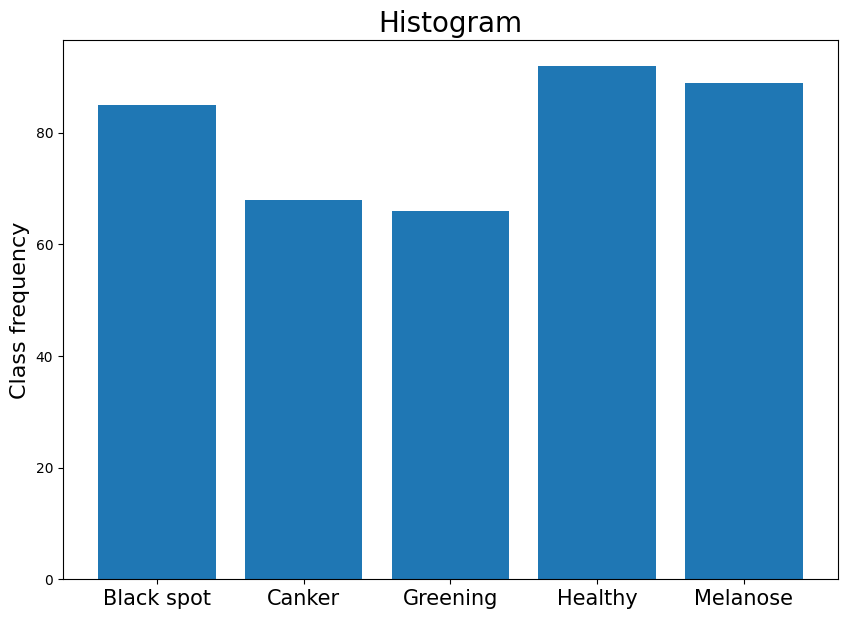

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.0)
figure = plt.figure()
plt.bar(classesIndexes, classesFrequency, align='center', alpha=1.0)
plt.ylabel('Class frequency', fontsize=16)
plt.xticks(classesIndexes, labels, fontsize=15)
plt.title('Histogram', fontsize=20)
plt.show()

In [ ]:
y_predicted = np.copy(y_true)

In [ ]:
ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)

In [ ]:
for i in ii:
    # Generating new class index
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)

c_m = confusion_matrix(y_true, y_predicted)


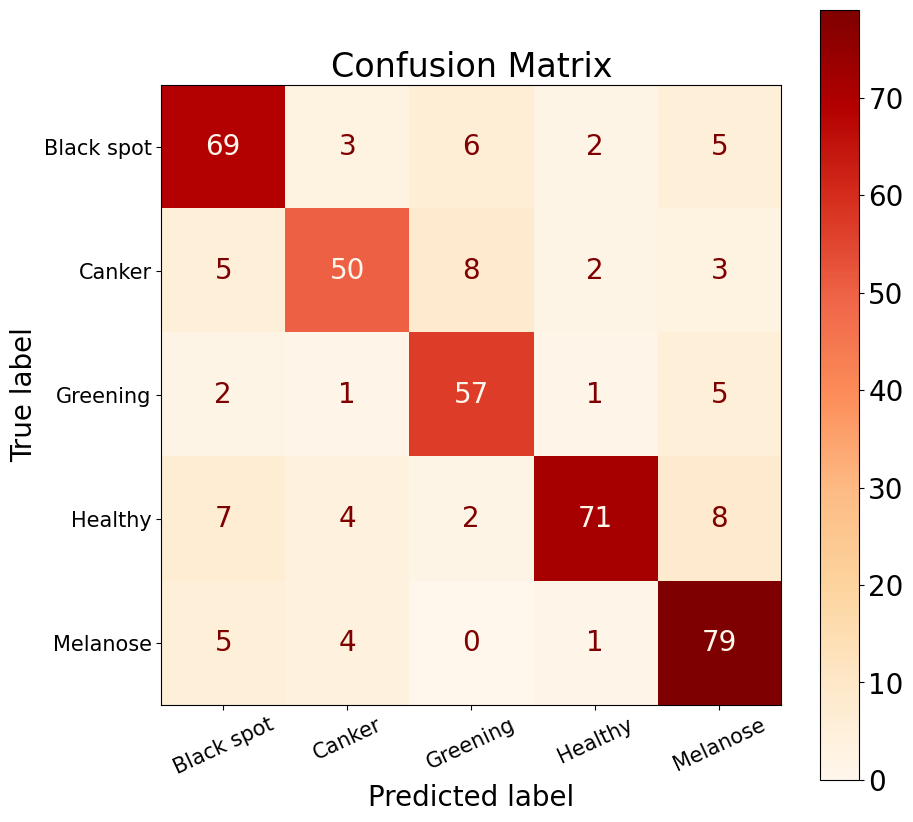

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['font.size'] = 20
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut connection."""
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x


In [ ]:
def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    """A block that has a conv layer at shortcut."""
    filters1, filters2, filters3 = filters
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1), strides=strides, name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same', name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(name=bn_name_base + '2c')(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides, name=conv_name_base + '1')(input_tensor)
    shortcut = layers.BatchNormalization(name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

In [ ]:
def ResNet162(input_shape=(224, 224, 3), classes=1000):
    """Instantiates the ResNet152 architecture."""
    img_input = layers.Input(shape=input_shape)

    x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = layers.BatchNormalization(name='bn_conv1')(x)
    x = layers.Activation('relu')(x)
    x = layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = layers.Dense(classes, activation='softmax', name='fc1000')(x)

    # Create model.
    model = tf.keras.models.Model(img_input, x, name='resnet152')

    return model


In [ ]:
model = ResNet162()

In [ ]:
import matplotlib.pyplot as plt

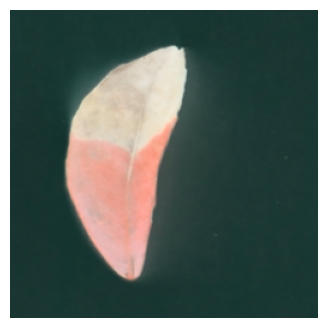

In [ ]:
from albumentations.augmentations.transforms import InvertImg
import cv2
import matplotlib.pyplot as plt

transform = InvertImg(p=1.0)

img1 = cv2.imread("/content/black spot.png")
img2 = cv2.imread("/content/canker image.png")
img3 = cv2.imread("/content/greening.png")
img4 = cv2.imread("/content/healthy.png")
img5 = cv2.imread("/content/melanose.jpg")

augmented_image = transform(image=img1)['image']

plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)
plt.show()


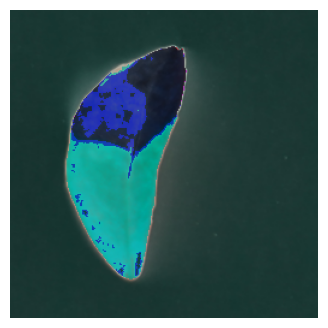

In [ ]:
from albumentations.augmentations.transforms import Solarize
transform = Solarize(threshold=70, p=1.0)
augmented_image = transform(image=img1)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

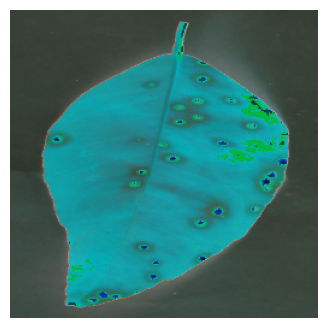

In [ ]:
from albumentations.augmentations.transforms import Solarize
transform = Solarize(threshold=70, p=1.0)
augmented_image = transform(image=img2)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

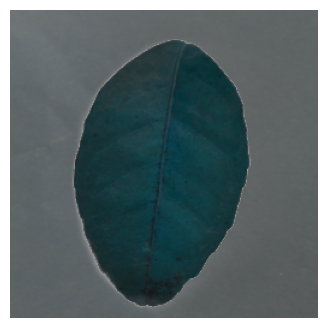

In [ ]:
from albumentations.augmentations.transforms import Solarize
transform = Solarize(threshold=100, p=1.0)
augmented_image = transform(image=img3)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

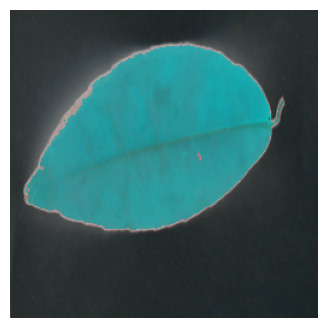

In [ ]:
from albumentations.augmentations.transforms import Solarize
transform = Solarize(threshold=70, p=1.0)
augmented_image = transform(image=img4)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)

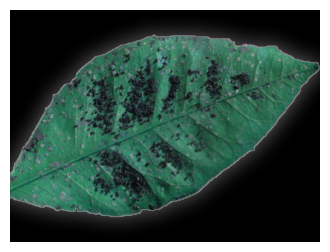

In [ ]:
from albumentations.augmentations.transforms import Solarize
transform = Solarize(threshold=180, p=1.0)
augmented_image = transform(image=img5)['image']
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(augmented_image)